In [32]:
#1. Data Pre-processing
import pandas as pd
# dtype_dict = {5: 'str', 6: 'str'}
data = pd.read_csv(r'C:\Users\baraa\Downloads\flights_data.csv', low_memory=False)
data.dropna(inplace=True) # Handle missing values
print('')
print(f"Statistical summary of dataset:\n{data.describe()}") # a statistical summary of the dataset
print('')
print(f"shape: {data.shape}") # understand the shape
print('')
print(data.info()) # understand the structure



Statistical summary of dataset:
       FLIGHT_NUMBER         MONTH           DAY   DAY_OF_WEEK  \
count   5.714008e+06  5.714008e+06  5.714008e+06  5.714008e+06   
mean    2.164384e+03  6.547799e+00  1.570759e+01  3.932643e+00   
std     1.754706e+03  3.397421e+00  8.774394e+00  1.985967e+00   
min     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%     7.280000e+02  4.000000e+00  8.000000e+00  2.000000e+00   
50%     1.681000e+03  7.000000e+00  1.600000e+01  4.000000e+00   
75%     3.211000e+03  9.000000e+00  2.300000e+01  6.000000e+00   
max     9.320000e+03  1.200000e+01  3.100000e+01  7.000000e+00   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
count         5.714008e+06    5.714008e+06       5.714008e+06  5.714008e+06   
mean          1.328907e+03    1.335066e+03       1.493187e+03  1.476373e+03   
std           4.835251e+02    4.964198e+02       5.069011e+02  5.259730e+02   
min           1.000000e+00    1.000000e+00       1.00000

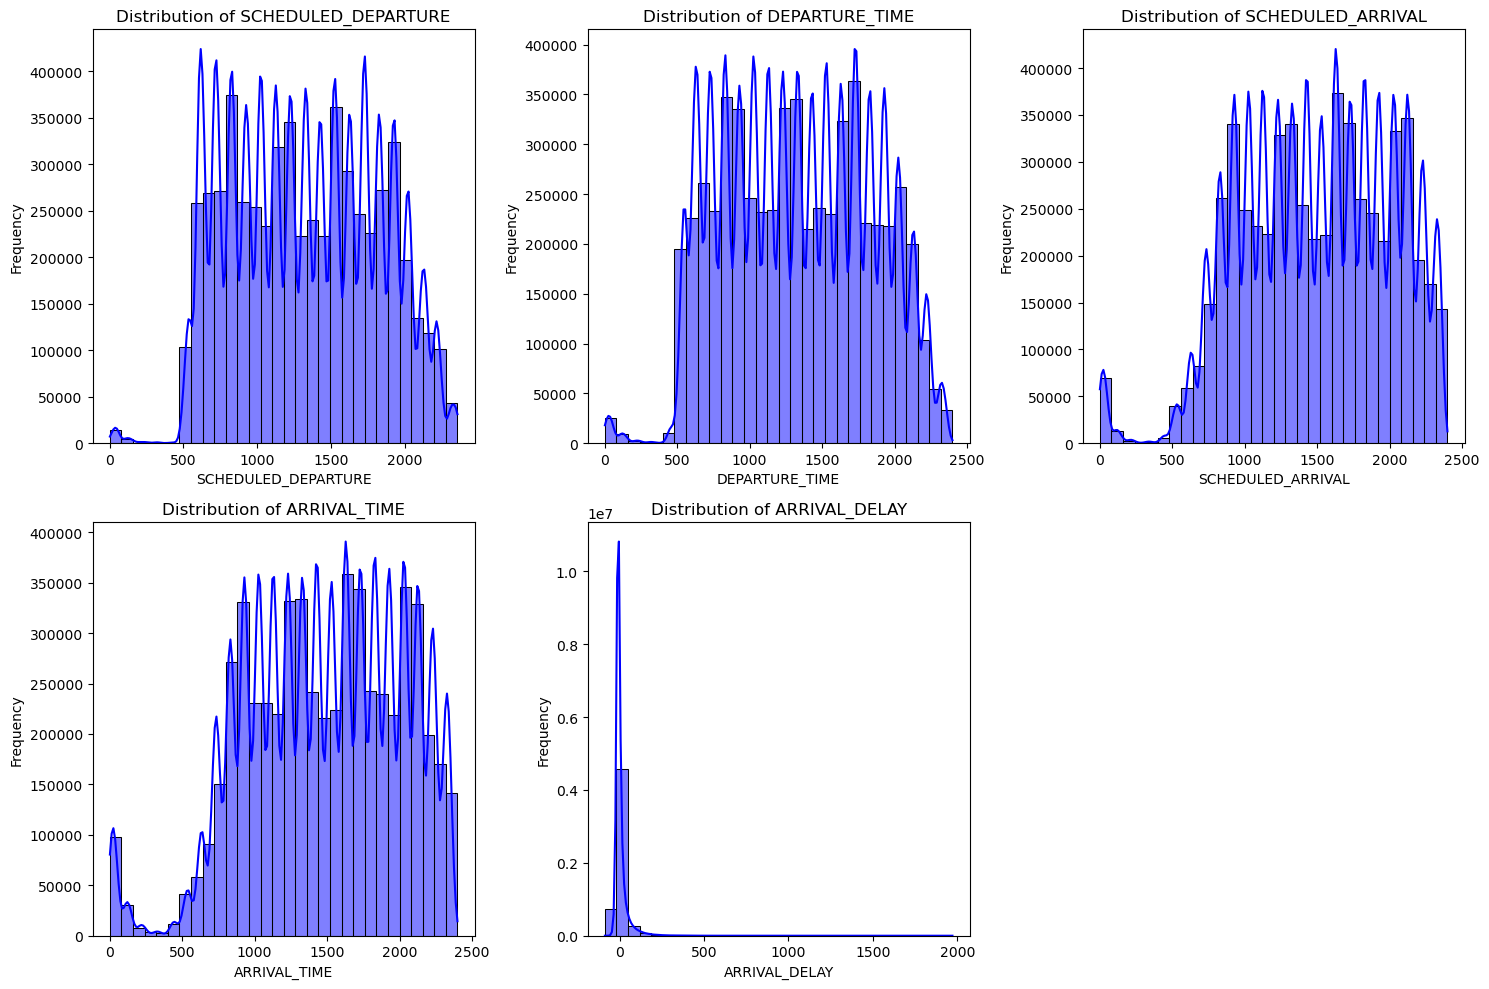

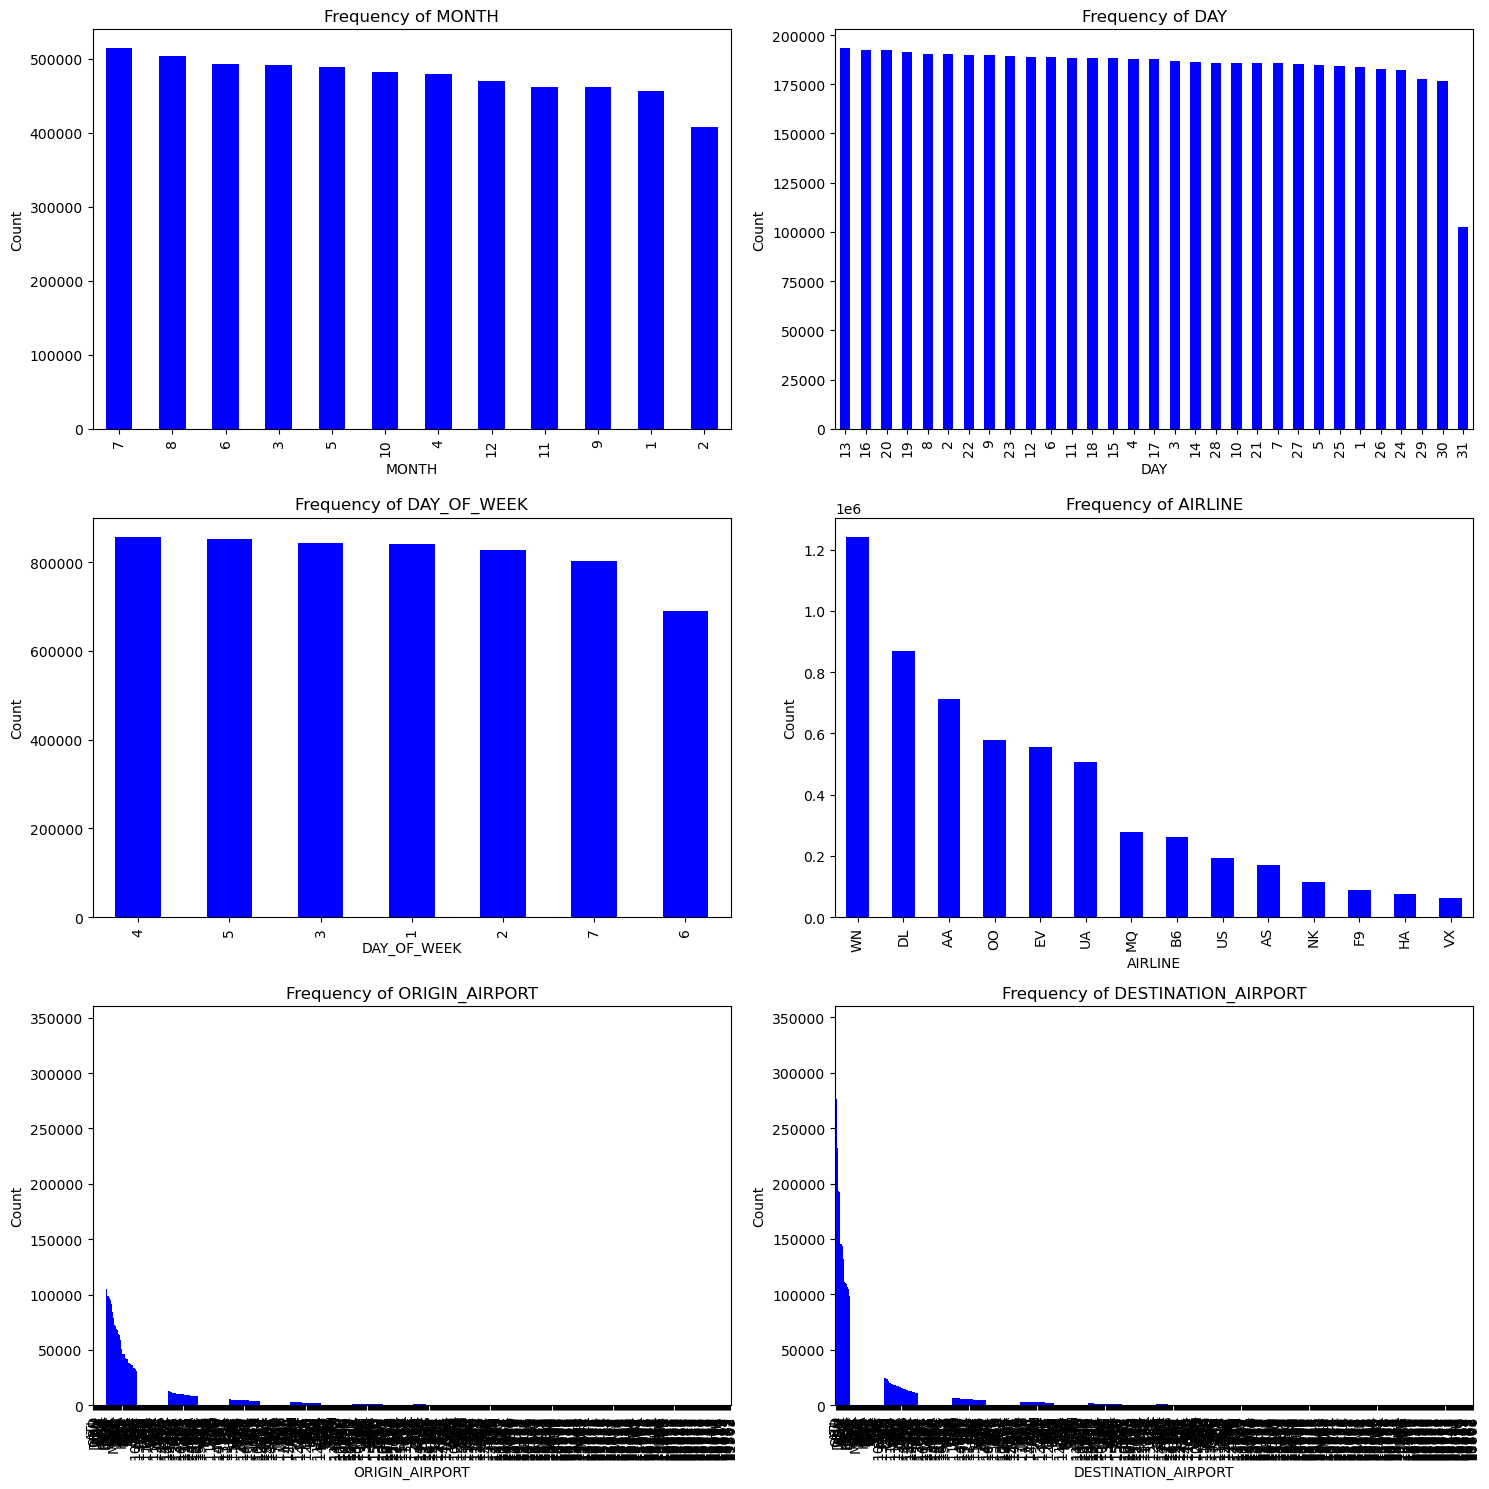

In [33]:
# continuous features (histograms)
continuous_cols = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']

plt.figure(figsize=(15, 10)) # initialize figure of (width, height)

index = 1 # initial position of first subplot
for col in continuous_cols:
    plt.subplot(2, 3, index) #(rows, columns, subplot position)
    sns.histplot(data[col], bins=30, kde=True, color='blue') #'col' temporary value for each column in the list/data
    # 'kde=True' to see the data's distribution. # salmon
    plt.title(f'Distribution of {col}') # title for each column, titled accordingly
    plt.xlabel(col)
    plt.ylabel('Frequency')
    index += 1 # Sets the next plot in the next position

plt.tight_layout() # cleaner look.
plt.show()

# From the histograms shown, 

# categorical features (bar plots)
categorical_cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

plt.figure(figsize=(15, 15))

index = 1
for col in categorical_cols:
    plt.subplot(3, 2, index)
    data[col].value_counts().plot(kind='bar', color='blue')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    index += 1

plt.tight_layout()
plt.show()

In [34]:
#3. Initial Data Exploration
print(data.head()) # first 5 rows of dataset
print(data.describe(include='all')) # also summarize non-numeric (categorical)

# • Idenyify the percentage of flights delayed by more than 15 minutes
delayed_percentage = (sum(data['ARRIVAL_DELAY'] > 15) / len(data)) * 100 # count divided by total number of flights, multiplied by 100 (for percentage)
print(f"The percentage of flights delayed by more than 15 minutes: %{round(delayed_percentage, 3)}") #rounded to 3 decimal places. (could have also used %.3f

   FLIGHT_NUMBER  MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT  \
0             98      1    1            4      AS            ANC   
1           2336      1    1            4      AA            LAX   
2            840      1    1            4      US            SFO   
3            258      1    1            4      AA            LAX   
4            135      1    1            4      AS            SEA   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  SCHEDULED_ARRIVAL  \
0                 SEA                    5          2354.0                430   
1                 PBI                   10             2.0                750   
2                 CLT                   20            18.0                806   
3                 MIA                   20            15.0                805   
4                 ANC                   25            24.0                320   

   ARRIVAL_TIME  ARRIVAL_DELAY  
0         408.0          -22.0  
1         741.0           -9.0  
2    

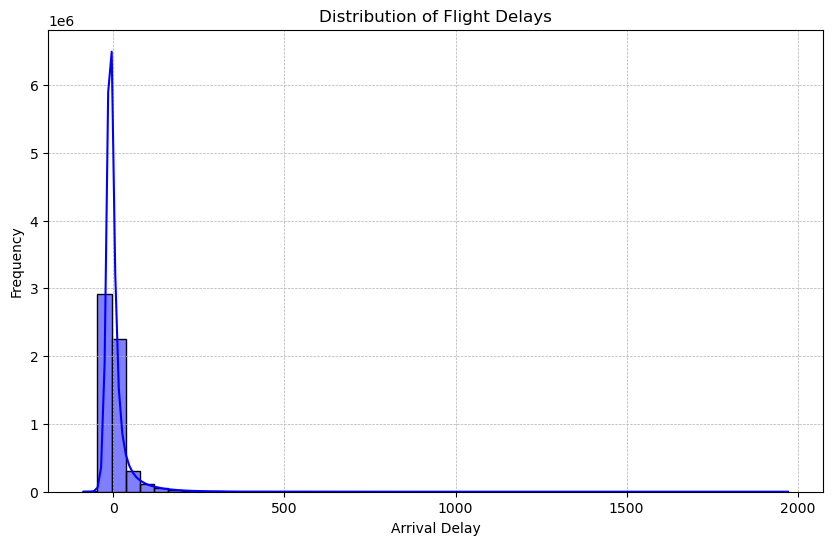

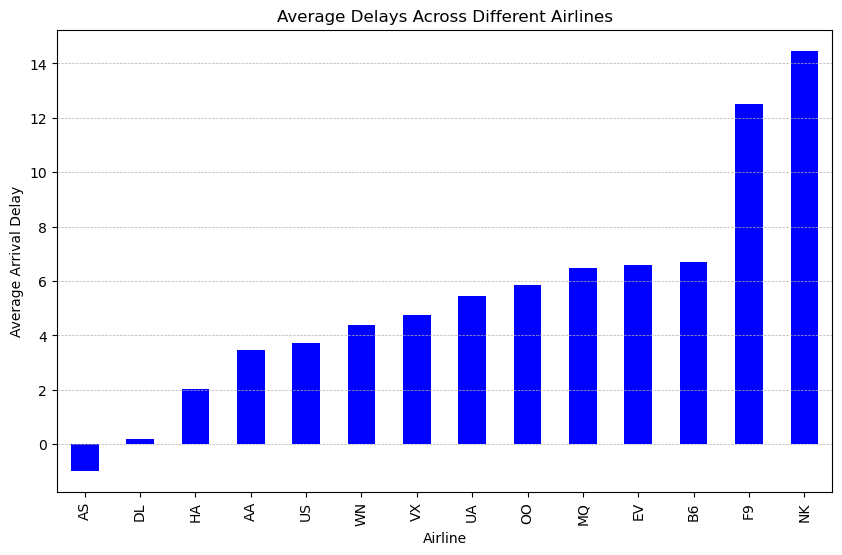

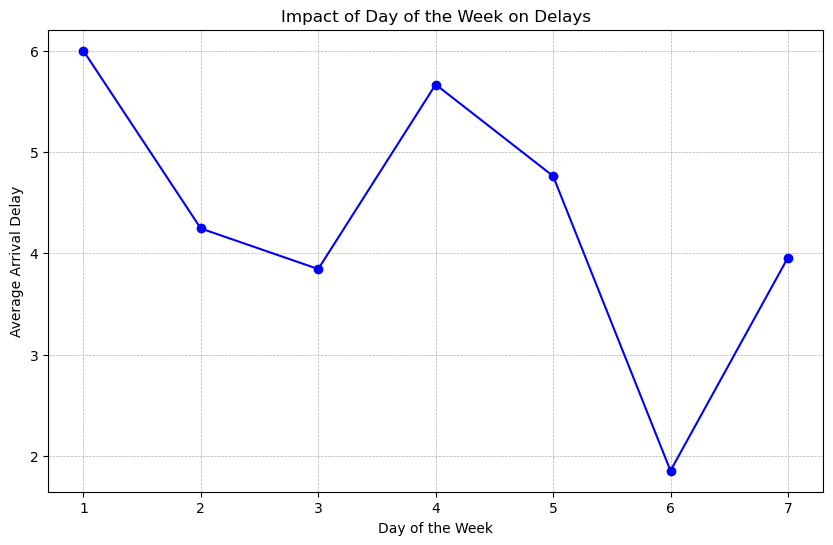

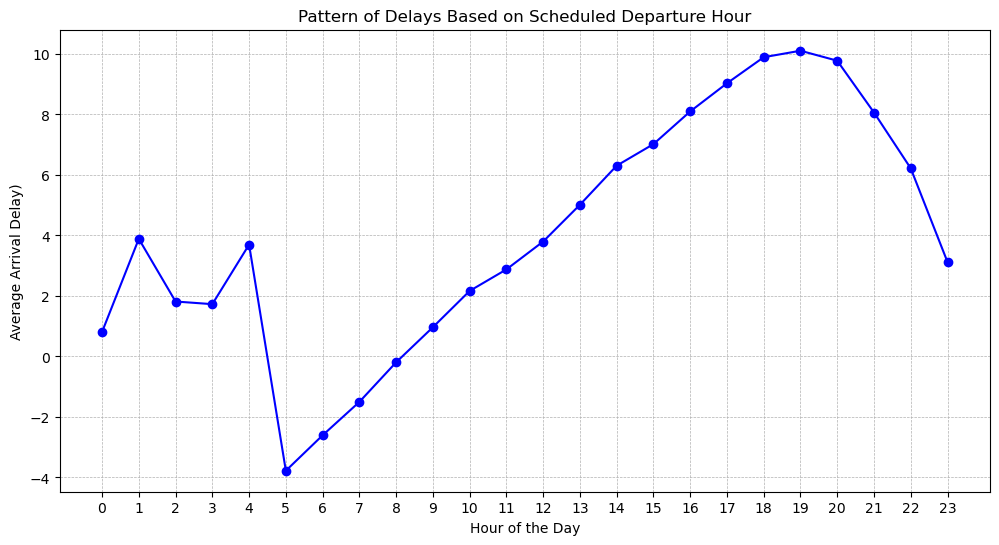

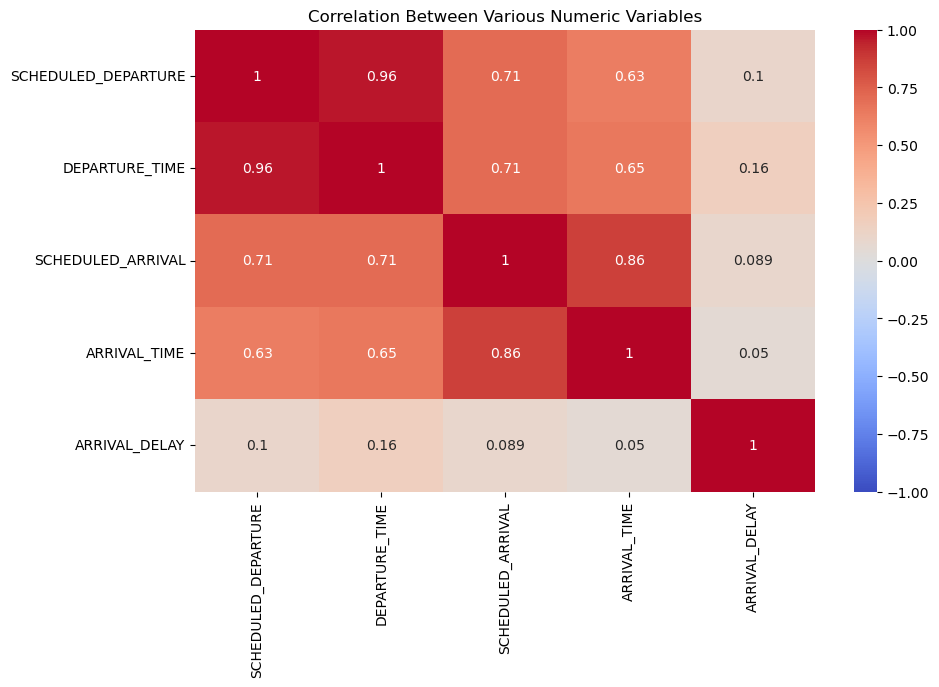

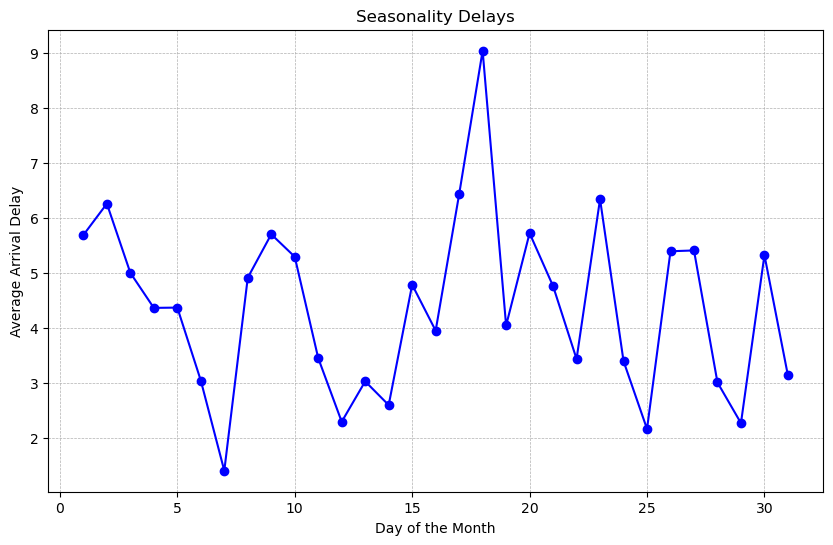

In [37]:
#4. Visual Analysis
# Visualize the distribution of flight delays.
plt.figure(figsize=(10, 6))
sns.histplot(data['ARRIVAL_DELAY'], bins=50, kde=True, color='blue')
plt.title('Distribution of Flight Delays')
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # 'which' draws major and minor grid lines
plt.show()

# from the histogram, most flights on time or slightly after.

# Compare average delays across different airlines.
airline_delays_mean = data.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values()

plt.figure(figsize=(10, 6))
airline_delays_mean.plot(kind='bar', color='blue')
plt.title('Average Delays Across Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.show()

# from the bar chart, the top 3 airlines with the most delays are: NK, F9, and B6, with NK and F9 performing significantly worse.

# Investigate the impact of the day of the week on delays.
day_delays_mean = data.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean()

plt.figure(figsize=(10, 6))
day_delays_mean.plot(kind='line', marker='o', color='blue')
plt.title('Impact of Day of the Week on Delays')
plt.xlabel('Day of the Week')
plt.ylabel('Average Arrival Delay')
plt.xticks(list(range(1, 8)))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Analyze if there's any patern of delays based on the scheduled departure hour.
data['DEPARTURE_HOUR'] = data['SCHEDULED_DEPARTURE'] // 100  # Integer division to get just the hour

hour_delay_mean = data.groupby('DEPARTURE_HOUR')['ARRIVAL_DELAY'].mean()

plt.figure(figsize=(12, 6))
hour_delay_mean.plot(kind='line', marker='o', color='blue')
plt.title('Pattern of Delays Based on Scheduled Departure Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Arrival Delay)')
plt.xticks(list(range(0, 24)))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Understand the correlation between the various numeric variables.
correlation_matrix = data[continuous_cols].corr() # -1 to 1 range (Strong negative to strong positive)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) # 'annot' shows corr values on heatmap
plt.title('Correlation Between Various Numeric Variables')
plt.show()

# Check if there's any seasonality in delays.
month_delay_mean = data.groupby('DAY')['ARRIVAL_DELAY'].mean() # average arrival delay for each day of the month, grouped.
                                                            # Needed to identify trend throughout month through center (mean).

plt.figure(figsize=(10, 6))
month_delay_mean.plot(kind='line', marker='o', color='blue')
plt.title('Seasonality Delays')
plt.xlabel('Day of the Month')
plt.ylabel('Average Arrival Delay')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

ORIGIN_AIRPORT  DESTINATION_AIRPORT
IAD             TTN                    381.0
SWF             PBI                    260.5
RIC             CAE                    228.0
RDU             IND                    208.0
10581           11618                  163.0
Name: ARRIVAL_DELAY, dtype: float64

ORIGIN_AIRPORT  DESTINATION_AIRPORT
LAS             LAX                    11.974614
SFO             LAX                    11.440000
LAX             SFO                    10.739187
ORD             LGA                    10.287331
LAX             LAS                     8.655535
LGA             ORD                     3.765552
SFO             JFK                     2.141464
LAX             JFK                     0.613872
JFK             SFO                    -0.554993
                LAX                    -2.671560
Name: ARRIVAL_DELAY, dtype: float64



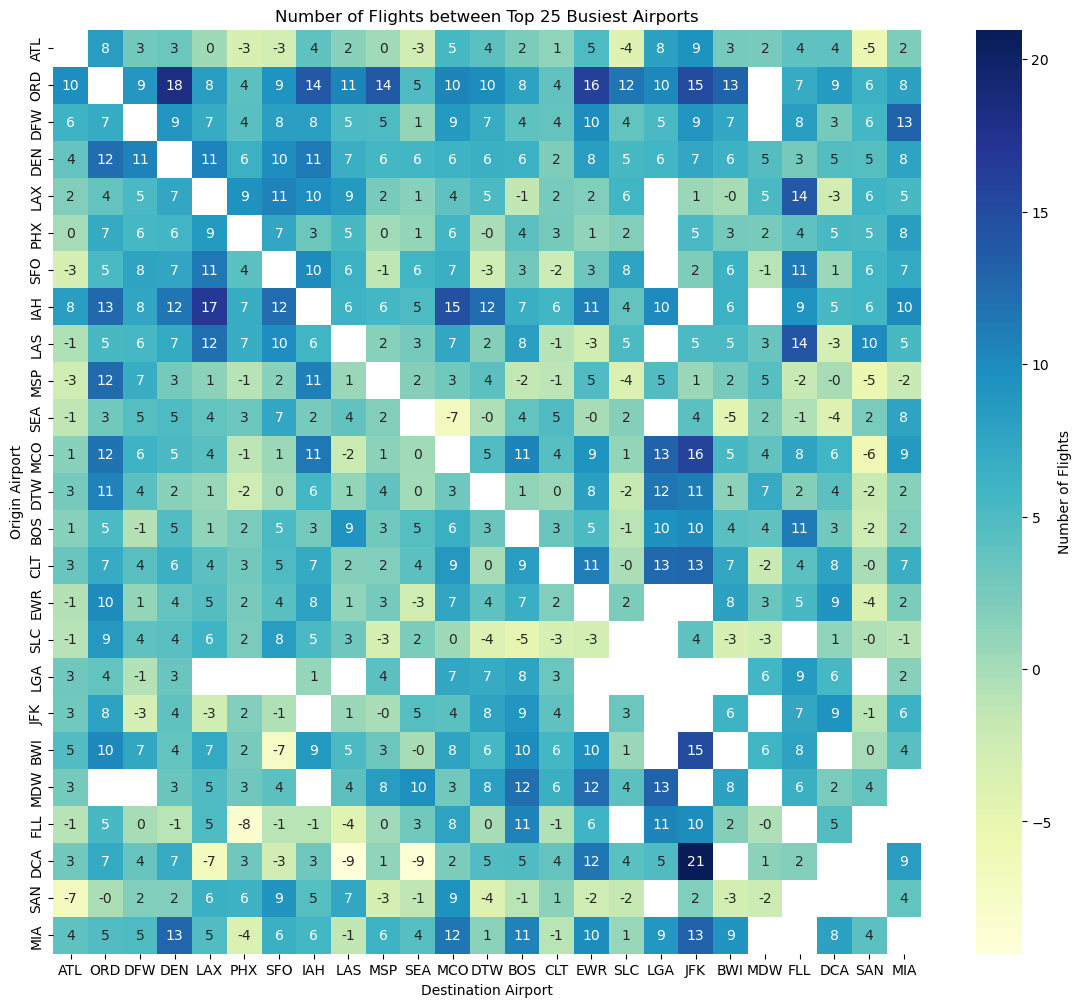

In [38]:
#5. Deep Dive Analysis:
# Identify the origin-destination pairs with the highest average delays.
origin_delays = data.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].mean()
print(origin_delays.sort_values(ascending=False).head(5))
print('')
# based on the data shown, the the origin airports with the highest average delays are: IAD, SWF and RIC.

# Analyze the 10 most frequent flight routes and their average delays.
top_routes = data.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).size().sort_values(ascending=False).head(10).index
top_routes_delays = origin_delays[top_routes]
print(top_routes_delays.sort_values(ascending=False))
print('')
# based on the data shown, the most frequent route was LAS to LAX, followed by SFO to LAX

# Visualize the relationship between the origin and destination airports using a heatmap.
# Determine the top n busiest airports based on total departures and arrivals
n = 25 # top busiest ariports
departure_counts = data['ORIGIN_AIRPORT'].value_counts()
arrival_counts = data['DESTINATION_AIRPORT'].value_counts()
total_counts = departure_counts.add(arrival_counts, fill_value=0)
top_airports = total_counts.nlargest(n).index

# Filter the heatmap data to include only the top n airports
filtered_data = heatmap_data.loc[top_airports, top_airports]

# Plotting the heatmap for top n airports
plt.figure(figsize=(14, 12))
sns.heatmap(filtered_data, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Number of Flights'})
plt.title(f"Number of Flights between Top {n} Busiest Airports")
plt.xlabel("Destination Airport")
plt.ylabel("Origin Airport")
plt.show()

# Due to the large dataset for a heatmap, the top 25 routes were taken to be plotted on the heatmap instead, for better visualization.
# each box represents number of flights within the top flights. In total, these symbolize the most prominent routes for analysis.

In [39]:
#6. Insights & Recommendations
# Document the insights derived from the visualizations and deep-dive analysis.
# The following are insights derived from the visualizations and deep-dive analysis:
# The majority of the flights were on-time or slighting delayed. The airlines with the highest average 
# arrival delay were F9 and NK having 12.4 and 14.3. The impact of day of the week on delayed was 
# more frequent during the beginning, middle, and end of the week: days 1, 4, and 7 of the week. 
#Similarly, the middle of the beginning and middle of the month had the highest arrival delays. When 
#looking at the delayed based on scheduled eparture hour, there is a linear increase between arrival 
#delays and hour of the day, starting from 5AM and peaking at 7PM.

#The Deep Dive Analysis shows that the highest average delays by route were IAD to TTN and SWF to 
# PBI having delays of 381 minutes and 260.5 minutes. The most frequent route delay was LAS to LAX. 
# The best flights were JFK to LAX and JFK to SFO, having minimal dealys and some early arrivals.


# Provide recommendations for airlines to reduce delays.
# Utilizing the data we have visualized would be a great way to adjust flight schedules. The data showed 
# some flights and origins airlines to have consistent delays. The data also showed specifics hours, days, 
# and weeks that were consistently delayed. Using this data can help in mitigating the delays specifically 
# at those times. Some realistic ways to go about would be: adjust flight schedules, crew schedules, and 
# wait times for flights.

# Advise passengers on the best times to fly or airlines to pick to avoid delays
# Pick the airlines with the least delays. If applicable, choose origin destinations with least delays. Travel 
# during Mondays, tuesdays, thursdays and fridays. Travel between beginning and middle, and end of 
# months. Also, travel around 4AM, or late night. And most importantly, use the historical data to stay 
# informed about flight timings.


In [43]:
#Bonus Task (for advanced students)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting features and target variable
X = data[['MONTH', 'DAY', 'DAY_OF_WEEK']] # For simplicity, using only a few features
y = data['ARRIVAL_DELAY'] # target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # splitting data 80-20, for training model. 20% reserve.

# Training the model
model = LinearRegression()
model.fit(X_train, y_train) # train linear regressin model using trained model

# Making predictions
y_pred = model.predict(X_test) # estimate/predict flight delays for the test set

# Evaluating the model
mse = mean_squared_error(y_test, y_pred) # compare model prediction to actual flight delays. lower mse is better.
print(f"Mean Squared Error: {mse}") # 1546 is a relatively high mse for this batch

import numpy as np
# Calculating the Root Mean Squared Error (RMSE)
print(f"Root mse: {np.sqrt(mse)}") # 38 minutes off from the actual time, which shows that it is a significant amount relative to this dataset.

# Apply feature engineering to improve the model's performance.


Mean Squared Error: 1520.0768176519018
Root mse: 38.98816253238798
